# Notebook Setup

As usual, we need to install Drake and our KinovaStation software, so go ahead and run this cell to do so.


In [ ]:
#@title Run Notebook Setup
import importlib
import sys
import os
from urllib.request import urlretrieve
import subprocess
import shutil

assert 'google.colab' in sys.modules, "This notebook is meant to be run in google colab!"

drake_url = "https://drake-packages.csail.mit.edu/tmp/drake-0.27.0-pip-bionic.tar.gz"
if importlib.util.find_spec('pydrake') is None:
    # We're in colab and don't have pydrake, so install it on the cloud machine.
    if os.path.isdir('/opt/drake'):
        shutil.rmtree('/opt/drake')
    print("Installing Drake")
    urlretrieve(drake_url, 'drake.tar.gz')
    subprocess.run(['mkdir', '/opt/drake'])
    subprocess.run(['tar', '-xzf', 'drake.tar.gz', '-C', '/opt/drake'], check=True)
    
    print("Installing other dependencies")
    subprocess.run(["pip3", "install", "meshcat"])
    subprocess.run(['apt-get', 'update', '-o', 'APT::Acquire::Retries=4', '-qq'], check=True)
    with open("/opt/drake/share/drake/setup/packages-bionic.txt", "r") as f:
        packages = f.read().splitlines()
    subprocess.run(['apt-get', 'install', '-o',
                    'APT::Acquire::Retries=4', '-o', 'Dpkg::Use-Pty=0',
                    '-qy', '--no-install-recommends'] + packages,
                    check=True)
    
    v = sys.version_info
    path = f"/opt/drake/lib/python{v.major}.{v.minor}/site-packages"
    if importlib.util.find_spec('pydrake') is None:
        sys.path.append(path)

# Start a meshcat server
print("Starting Meshcat")
from meshcat.servers.zmqserver import start_zmq_server_as_subprocess
proc, zmq_url, web_url = start_zmq_server_as_subprocess(server_args=['--ngrok_http_tunnel'])

# Clone our github repo
install_path = '/opt/kinova_drake'
if not os.path.isdir(install_path):
    print("Cloning github repo")
    subprocess.run(['git','clone','https://github.com/vincekurtz/kinova_drake.git',install_path])
sys.path.append(install_path)

# Install open3d point cloud library
print("Installing Open3D")
subprocess.run(['pip3','install','open3d'])

print("Done!")

# Image Processing With OpenCV

First we load an image with opencv.

In [19]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import io

image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Eva_and_Franco_Mattes%2C_Ceiling_Cat.jpg/800px-Eva_and_Franco_Mattes%2C_Ceiling_Cat.jpg"
image = io.imread(image_url)

print(type(image))
print(image)
print(image.shape)


<class 'numpy.ndarray'>
[[[246 246 248]
  [246 246 248]
  [246 246 248]
  ...
  [237 237 239]
  [237 237 239]
  [237 237 239]]

 [[247 247 249]
  [247 247 249]
  [247 247 249]
  ...
  [237 237 239]
  [237 237 239]
  [237 237 239]]

 [[247 247 249]
  [247 247 249]
  [247 247 249]
  ...
  [237 237 239]
  [237 237 239]
  [237 237 239]]

 ...

 [[240 240 242]
  [240 240 242]
  [240 240 242]
  ...
  [234 234 234]
  [234 234 234]
  [234 234 234]]

 [[240 240 242]
  [240 240 242]
  [241 241 243]
  ...
  [235 235 235]
  [235 235 235]
  [235 235 235]]

 [[241 241 243]
  [241 241 243]
  [241 241 243]
  ...
  [235 235 235]
  [235 235 235]
  [235 235 235]]]
(526, 800, 3)


Note how the image is basically an array with RGB values.

We can display the image on colab using the `cv2_imshow` function:

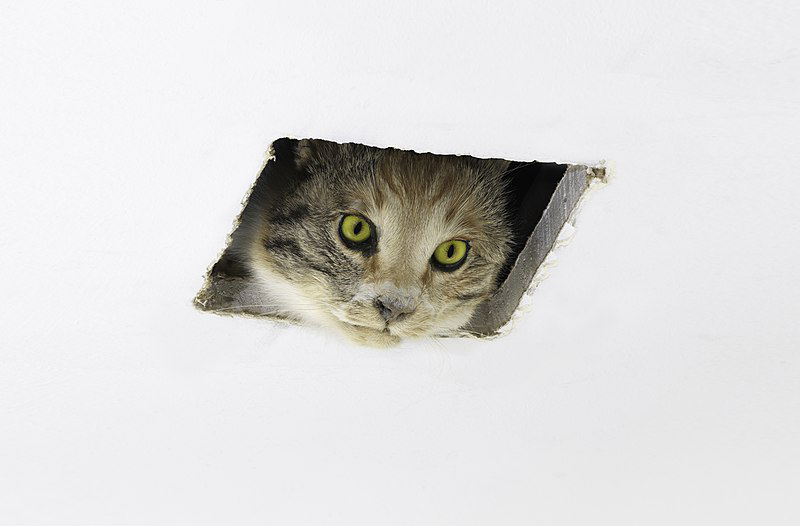

In [14]:
cv2_imshow(image)

Note that the color is messed up though. That's because the RGB channels are messed up. We can fix that. 

In [20]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the new image here

We can do a lot with OpenCV: read more about it in the docs. 

But what we're particularly interested in is identifying a region with a particular color. 

In [21]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

In [128]:
min_hsv = (85, 50, 80)
max_hsv = (90, 255, 255)

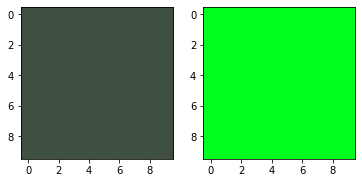

In [129]:
from matplotlib.colors import hsv_to_rgb
import matplotlib.pyplot as plt

min_square = np.full((10, 10, 3), min_hsv, dtype=np.uint8) / 255.0
max_square = np.full((10, 10, 3), max_hsv, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(min_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(max_square))
plt.show()

17019


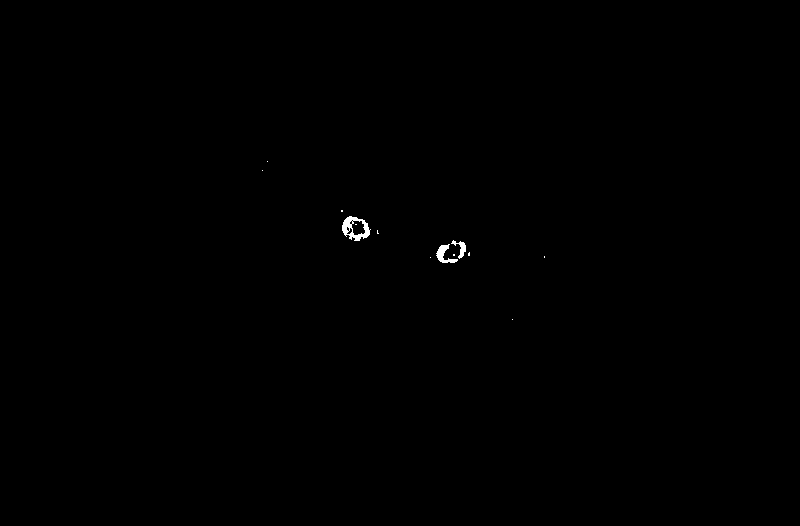

In [154]:
mask = cv2.inRange(hsv_image, min_hsv, max_hsv)
print(sum(sum(mask)))
cv2_imshow(mask)

#cv2_imshow(cv2.bitwise_and(image,image,mask=mask))


Now that we have a mask, we can get a bounding box around it

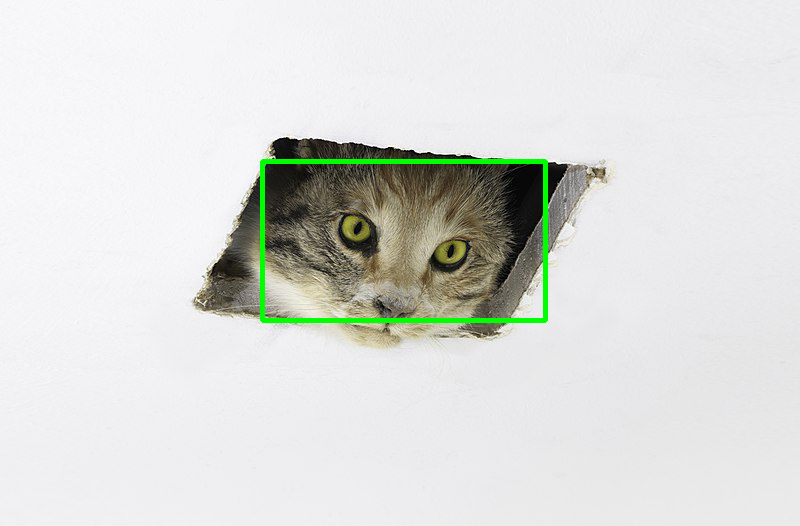

In [153]:
x, y, w, h = cv2.boundingRect(mask)
rect1 = cv2.rectangle(image.copy(),(x,y),(x+w,y+h),(0,255,0),3)

cv2_imshow(rect1)


# Using the Simulated Camera

# Visual Servoing

# Coming Soon...
- Interface with camera/depth image
    - Viewing the image, operating on it within a control loop
- Using OpenCV
- Visual servoing